# Twitter API using tweepy 

In [1]:
import pandas as pd 
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import sys
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')
import json
import seasborn as sns


ModuleNotFoundError: No module named 'seasborn'

In [14]:
# tokens
c_key = 'MbV3i8FSluNaYm8din7nKBQHu'
c_secret = 'Mc3XXfmPx6fA8MzOwBvu84F5AMvgDp4XI8WI0tFtUWCQqWT1iQ'
a_token = '1295111663046340614-juLEYcY1HHzrt4F21GXDYuilTTYTA8'
a_secret = 'qK6VLVcvIzA8LoXiX7urUdOCWwWwkBBFzahWONvBBP3Ud'

# tweepy OAuth authenticator 
auth = tweepy.OAuthHandler(c_key, c_secret)
auth.set_access_token(a_token, a_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

posts = api.user_timeline(screen_name='AMCTheatres', count=100, lang='en', tweet_mode='extended')

print('Five recent tweets from AMCTheatres: \n')
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i+=1

Five recent tweets from AMCTheatres: 

1) Wait a minute, Doc. You are telling me @BacktotheFuture is back on the big screen at #AMCTheatres with movie tickets for $5+tax*. That is heavy! Tickets on sale now:  https://t.co/bKVZEjgAlE https://t.co/lrGWJ0EKnC

2) Now through 10/31, get your 1st month of #AMCTheatres #AList for just $5+tax, a savings of $15 or more! Which 3 movies will you see first? Subscribe now: https://t.co/IxXSDT9p9I https://t.co/m6XXytkVn0

3) Those aren't pillows! https://t.co/FJ7tMNYgxO

4) Make Monday movie night with #AMCTheatresOnDemand and get $3 rentals all-day long! Browse movies: https://t.co/dqh35PWEpm https://t.co/LiTw9SD4ep

5) Exclusive interview with @RussellCrowe and #carenpistorius welcoming you back for a classic big screen thriller. @UNHINGEDmovie opens 8/21, tickets on sale now: https://t.co/519E2QUsNd https://t.co/zEMz8omAhn



In [15]:
api.rate_limit_status()


{'rate_limit_context': {'access_token': '1295111663046340614-juLEYcY1HHzrt4F21GXDYuilTTYTA8'},
 'resources': {'lists': {'/lists/list': {'limit': 15,
    'remaining': 15,
    'reset': 1597699791},
   '/lists/memberships': {'limit': 75, 'remaining': 75, 'reset': 1597699791},
   '/lists/subscribers/show': {'limit': 15,
    'remaining': 15,
    'reset': 1597699791},
   '/lists/members': {'limit': 900, 'remaining': 900, 'reset': 1597699791},
   '/lists/subscriptions': {'limit': 15, 'remaining': 15, 'reset': 1597699791},
   '/lists/show': {'limit': 75, 'remaining': 75, 'reset': 1597699791},
   '/lists/ownerships': {'limit': 15, 'remaining': 15, 'reset': 1597699791},
   '/lists/subscribers': {'limit': 180, 'remaining': 180, 'reset': 1597699791},
   '/lists/members/show': {'limit': 15, 'remaining': 15, 'reset': 1597699791},
   '/lists/statuses': {'limit': 900, 'remaining': 900, 'reset': 1597699791}},
  'application': {'/application/rate_limit_status': {'limit': 180,
    'remaining': 178,
    '

In [16]:
dates = []
for i in posts:
    dates.append(i.created_at)
print(min(dates))
print(max(dates))

2020-07-28 21:00:33
2020-08-17 20:30:13


In [17]:
posts.sort

<function ResultSet.sort(*, key=None, reverse=False)>

In [18]:
dir(posts)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_max_id',
 '_since_id',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'ids',
 'index',
 'insert',
 'max_id',
 'pop',
 'remove',
 'reverse',
 'since_id',
 'sort']

In [21]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])


In [24]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+','', text)
    return text

df['Tweets'] = df['Tweets'].apply(clean_text)

In [25]:
df['Tweets'].head()

0    Wait a minute, Doc. You are telling me  is bac...
1    Now through 10/31, get your 1st month of AMCTh...
2                               Those aren't pillows! 
3    Make Monday movie night with AMCTheatresOnDema...
4    Exclusive interview with  and carenpistorius w...
Name: Tweets, dtype: object

In [26]:
# subjectivity 
def get_subj(text):
    return TextBlob(text).sentiment.subjectivity

# polarity
def get_polar(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(get_subj)
df['Polarity'] = df['Tweets'].apply(get_polar)

df.head()

,Tweets,Subjectivity,Polarity
0,"Wait a minute, Doc. You are telling me is bac...",0.200000,-0.083333
1,"Now through 10/31, get your 1st month of AMCTh...",0.416667,0.437500
2,Those aren't pillows!,0.000000,0.000000
3,Make Monday movie night with AMCTheatresOnDema...,0.400000,-0.062500
4,Exclusive interview with and carenpistorius w...,0.088889,0.055556


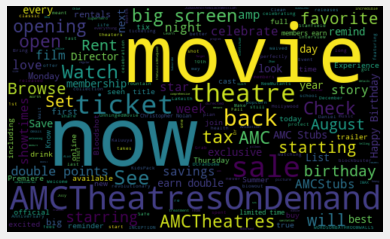

In [43]:
# word cloud
words = ' '.join([tweet for tweet in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state=21, max_font_size = 110).generate(words)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [41]:
words.split()


TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [19]:
search_words = input('Enter a keyword or hashtag to search: ')
no_of_search = int(input('How many tweets?'))

tweets = tweepy.Cursor(api.search, q=search_words, lang='English').items(no_of_search)
new_list = []
for tweet in tweets:
    new_list.append(tweet.text)
#     anaylsis = TextBlob(tweet.text)
new_list

Enter a keyword or hashtag to search: bitcoin
How many tweets?1


[]